## <span style="color:blue"> Stroke Prediction Dataset (뇌졸중 예측 데이터셋) </span>
#### - 뇌졸중은 전세계적으로 2번째로 위험한 질병이며 약 11%가 사망 
#### - 환자의 성별, 나이, 질병, 흡연 여부를 판단하여 뇌졸중을 예측하는 데이터 셋

## <span style="color:blue"> Contents </span>
#### 1. Load Data
#### 2. Exploratory Data Analysis (EDA)
#### 3. Data Preprocessing
#### 4. ML Model Evaluation
#### 5. Conclusion

## <span style="color:blue"> Attribute Information </span>
#### - 1. id : unique identifier
#### - 2. gender(성별) : Male, Female, Other
#### - 3. age(나이) 
#### - 4. hypertension(고혈압) : 0 --> doesn't have, 1 --> has
#### - 5. heart_disease(심장병) : 0 --> doesn't have, 1 --> has
#### - 6. ever_married(결혼여부) : Yes, No
#### - 7. work_type(일) : children, Govt_jov, Never_worked, Private, Self-employed
#### - 8. Residence_type(거주지) : Rural, Urban
#### - 9. avg_glucose_level(혈당 평균 수치) : average glucose level in blood
#### - 10. bmi(체질량지수) : body mass index
#### - 11. smoking_status(흡연여부) : formerly smoked, never smoked, smokes, Unknown
#### - 12. stroke(뇌졸중) : 0 --> doesn't have, 1 --> has

#### * Note: "Unknown" in smoking_status means that the information is unavailable for this patient

#### * 데이터 출처 : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

## <span style ="color:blue"> 1. Load Data </span>

### 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

### 파일 불러오기 (healthcare-dataset-stroke-data)

In [2]:
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
stroke_data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [5]:
stroke_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [6]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## <span style ="color:blue"> 2. Exploratory Data Analysis (EDA) </span>

### 변수간 상관계수 분석

#### <span style = "color:red"> 상관관계 분석 주의점 </span>
##### 1) 숫자로 표현 가능한 연속형 데이터만 상관관계 분석 가능
##### 2) -1 ~ 1 사이의 값을 가짐
##### 3) 인과관계를 의미하지 X
##### - x와 y가 유사한 경향으로 증가 or x/y가 증가할 때 y/x가 감소하는 경향 정도만 설명 가능
##### 출처 https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=kiddwannabe&logNo=221205309816

In [7]:
corr_data= stroke_data.corr()
corr_data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


<AxesSubplot:title={'center':'Correlation of Features'}>

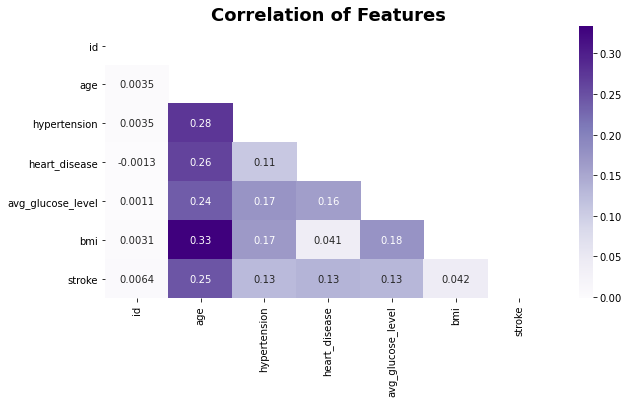

In [8]:
mask = np.zeros_like(corr_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.rcParams['figure.figsize']=(10,5)
plt.title("Correlation of Features", fontsize=18, fontweight='bold')

sns.heatmap(corr_data, annot=True, cmap='Purples', mask=mask)

### Outlier (이상치) 탐지

#### <span style = "color:red"> Outlier(이상치)란? </span>
##### - 이상(문제)이 있는 데이터
##### - 이상치 데이터는 제거해줘야 올바른 학습 결과를 도출해낼 수 있음

#### <span style = "color:red"> Outlier data 탐지 방법 </span>
##### - IQR (Inter Qunatile Range)
##### - 사분위 값의 편차를 이용하는 방법 --> boxplot을 사용해서 확인 가능!
##### - 사분위는 데이터를 값이 높은 순으로 정렬하고, 1/4씩 나눈것을 의미
##### - Q1 : 25%, Q2 : 50%, Q3 : 75%, Q4 : 100%

##### - IQR = Q1 ~ Q3 사이의 지점을 의미하며, Q3-Q1 값을 의미
##### - IQR을 이용해서 이상치를 탐지하는 방법 : IQR * 1.5
##### - 최대값 : IQR * 1.5 + Q3
##### - 최소값 : Q1 - IQR * 1.5
##### 즉, 최대값보다 크거나 최소값보다 작은 값을 이상치 데이터라고 함
##### 출처 https://lsjsj92.tistory.com/556

<AxesSubplot:xlabel='age'>

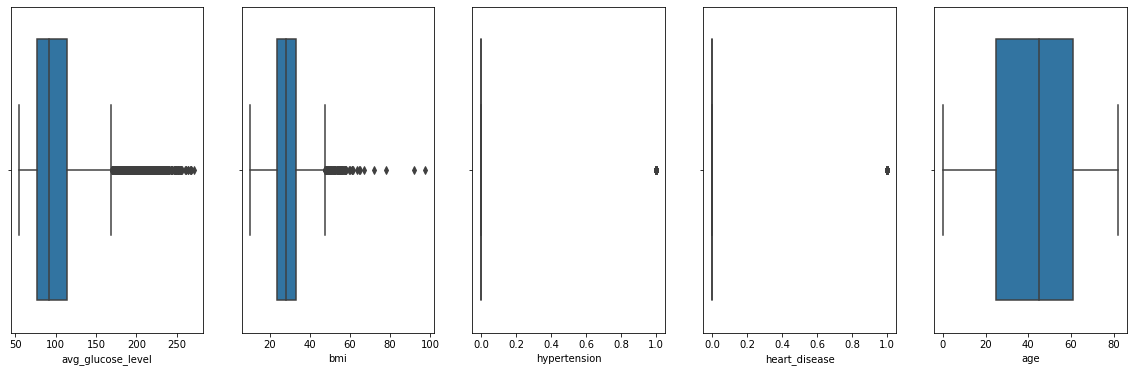

In [9]:
fig, ax = plt.subplots(1,5, figsize=(20,6))

sns.boxplot(x = stroke_data['avg_glucose_level'], ax=ax[0])
sns.boxplot(x = stroke_data['bmi'], ax=ax[1])
sns.boxplot(x = stroke_data['hypertension'], ax=ax[2])
sns.boxplot(x = stroke_data['heart_disease'], ax=ax[3])
sns.boxplot(x = stroke_data['age'], ax=ax[4])

### Outlier (이상치) 처리

#### <span style="color: green"> Outlier 데이터에 log 함수 취하기 </span>
##### - 정규성을 높이고 정확한 값을 얻기 위함
##### - 데이터 간 편차를 줄여서 왜도와 첨도를 줄일 수 있기 때문에 정규성이 높아짐
##### - log 함수 : 큰 수를 작게 만들고 복잡한 계산을 간편하게 해주는 역할
##### * 왜도 : 데이터가 한쪽으로 치우친 현상
##### * 첨도 : 분포가 얼마나 뾰족한지를 나타내는 현상


In [10]:
stroke_data['avg_glucose_level'] = np.log(stroke_data['avg_glucose_level'])
stroke_data['bmi'] = np.log(stroke_data['bmi'])

In [11]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,4.592465,3.328423,0.048728
std,21161.721625,22.612647,0.296607,0.226063,0.361985,0.265064,0.215320
min,67.000000,0.080000,0.000000,0.000000,4.009513,2.332144,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,4.346982,3.157000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,4.520538,3.335770,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,4.736988,3.499533,0.000000
max,72940.000000,82.000000,1.000000,1.000000,5.604846,4.580877,1.000000


In [12]:
# 참고사항

# 이상치 제거하는 함수
# 데이터 유실 등의 이유로 권장하는 방법은 X

# def get_rid_of_outliers(df=None, col=None):
#     q_25 = np.percentile(df[col].values, 25)
#     q_75 = np.percentile(df[col].values, 75)
    
#     IQR = q75 - q25
#     IQR_weight = IQR * 1.5
    
#     max = IQR_weight + q75
#     min = q_25 - IQR_weight
    
#     outlier_idx = df[col][(df[col] < min) | (df[col] > max)].index
    
#     return outlier_idx

# outlier_idx = get_rid_of_outliers(df=df, col='')
# df.drop(outlier_idx, axis=0, inplace=True)

### 성별에 따른 뇌졸중 발생 분석

In [13]:
yes_stroke_data = stroke_data[stroke_data['stroke']==1]

In [14]:
yes_stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,5.432367,3.600048,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,5.309307,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,4.662684,3.481240,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,5.143008,3.538057,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,5.159745,3.178054,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,4.442181,3.602777,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,4.059235,3.430756,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,4.366913,3.377588,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,4.475062,NaN,Unknown,1


In [15]:
gender_stroke = yes_stroke_data[['gender', 'stroke']].groupby(by=['gender'], as_index=False).count().sort_values(by=['gender'])
gender_stroke = gender_stroke.reset_index(drop=True)
gender_stroke

,gender,stroke
0,Female,141
1,Male,108


### 고혈압 유무에 따른 뇌졸중 발생 분석

In [16]:
hypertension_stroke = stroke_data[['hypertension', 'stroke']].groupby(by=['hypertension'], as_index=False).mean().sort_values(by=['hypertension'])
hypertension_stroke = hypertension_stroke.reset_index(drop=True)
hypertension_stroke

,hypertension,stroke
0,0,0.039679
1,1,0.132530


### 심장병 유무에 따른 뇌졸중 발생 분석

In [17]:
heart_disease_stroke = stroke_data[['heart_disease', 'stroke']].groupby(by=['heart_disease'], as_index=False).mean().sort_values(by=['heart_disease'])
heart_disease_stroke = heart_disease_stroke.reset_index(drop=True)
heart_disease_stroke

,heart_disease,stroke
0,0,0.041787
1,1,0.170290


### 뇌졸중 발생 비율 차트 

In [18]:
stroke_data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

No stroke data:  4861 
Yes stroke data:  249


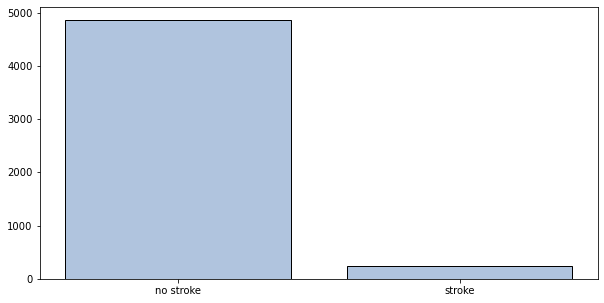

In [19]:
no_stroke_data_cnt = stroke_data[stroke_data['stroke']==0]['stroke'].count()
yes_stroke_data_cnt = yes_stroke_data['stroke'].count()

print("No stroke data: ",no_stroke_data_cnt, "\nYes stroke data: ",yes_stroke_data_cnt)

labels = ['no stroke', 'stroke']
cnt = [no_stroke_data_cnt, yes_stroke_data_cnt]

plt.bar(labels, cnt, color='lightsteelblue',edgecolor='black')
plt.show()

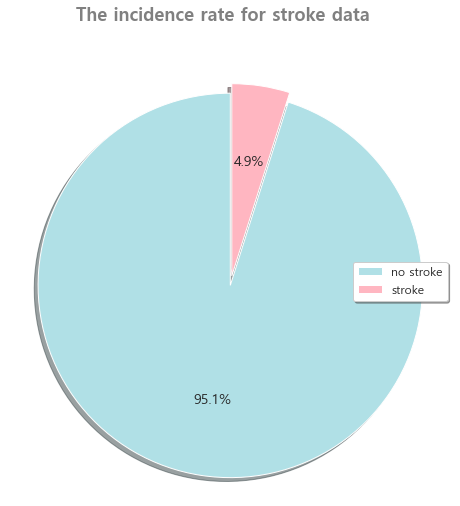

In [20]:
fig = plt.figure(figsize=(8,8))
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='white')

colors = ['powderblue', 'lightpink']
explode = (0.05, 0)
stroke_index = ['no stroke', 'stroke']

plt.pie(stroke_data['stroke'].value_counts(), colors = colors, explode = explode, shadow = True, 
        autopct="%1.1f%%", startangle = 90, textprops = {'fontsize':14})
plt.legend(stroke_index, loc = 'right', shadow = True, fontsize = 12)
plt.axis('equal')
plt.suptitle("The incidence rate for stroke data", fontsize = 18, fontweight = 'bold', color='gray')

plt.savefig("The incidence rate for stroke.png")
plt.show()


### 나이, 혈당, 체질량지수에 따른 뇌졸중 발생 분석 그래프 

#### <span style = "color:orange"> KDE plot? </span>
##### - 커널 밀도 추정 그래프
##### - 커널 함수와 데이터를 바탕으로 연속성 있는 확률 밀도 함수를 추정하는 것
##### - 관측된 데이터마다 해당 데이터를 중심으로 커널 함수 생성, 해당 함수를 모두 더하고 데이터 개수로 나눠서 확률 밀도 함수 구함
##### - histogram보다 부드러운 형태의 분포 곡선
#### <span style = "color:orange"> Density Estimation (밀도 추정)? </span>
##### - 관측된 데이터로부터 변수가 가잘 수 있는 모든 값의 밀도(확률)를 추정하는 것
#### <span style = "color:orange"> Kernel Function (커널 함수)? </span>
##### - 아래 3가지 조건을 모두 만족하는 함수
##### 1) 적분값 = 1
##### 2) 원점 중심 대칭 
##### 3) Non-negative
##### 출처 https://sungkee-book.tistory.com/2

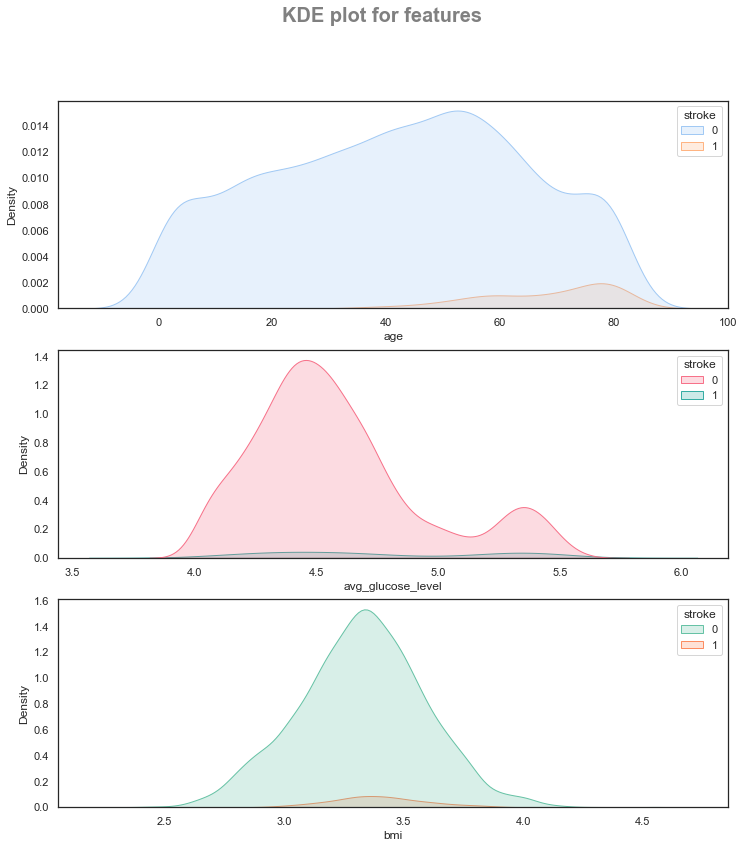

In [21]:
sns.set_style("white")
fig, ax = plt.subplots(3,1, figsize=(12,13))

plt.suptitle("KDE plot for features", fontsize = 20, fontweight = 'bold', color='gray')

sns.kdeplot(x=stroke_data['age'], hue=stroke_data['stroke'], shade=True, palette="pastel", ax=ax[0])
sns.kdeplot(x=stroke_data['avg_glucose_level'], hue=stroke_data['stroke'], shade=True, palette="husl", ax=ax[1])
sns.kdeplot(x=stroke_data['bmi'], hue=stroke_data['stroke'], shade=True, palette="Set2", ax=ax[2])

plt.savefig("KDE plot for features.png")

### 그 외 변수들에 따른 뇌졸중 발생 분석 

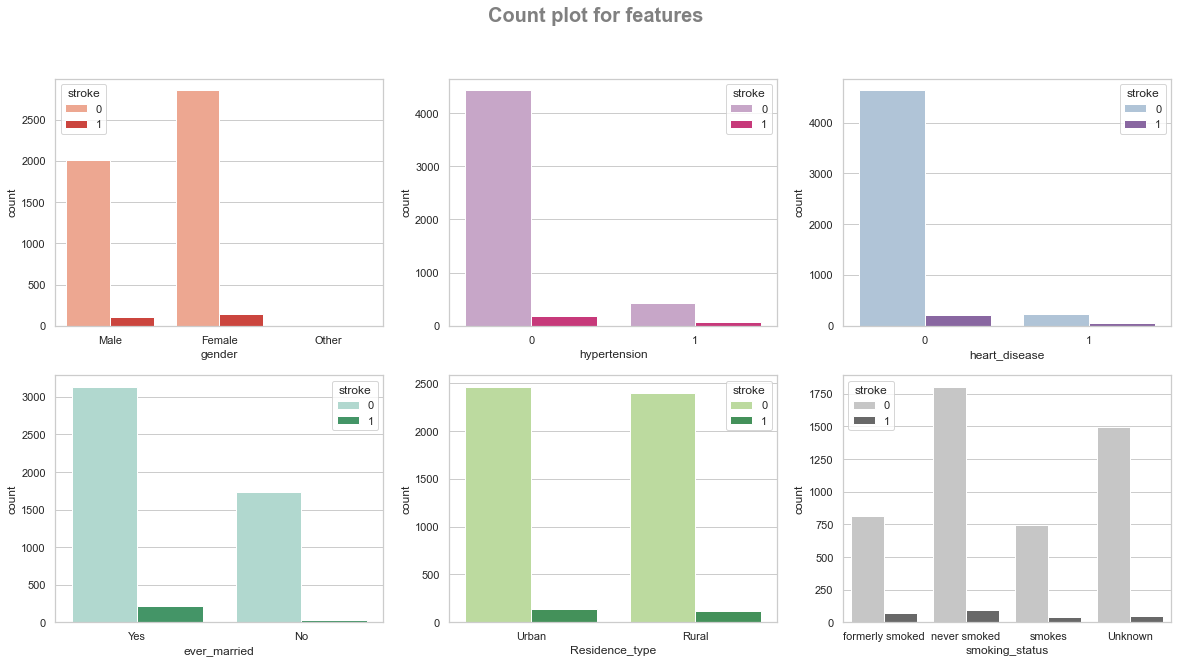

In [22]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(2,3,figsize=(20,10))

plt.suptitle("Count plot for features", fontsize = 20, fontweight = 'bold', color='gray')

ax0 = sns.countplot(x='gender', hue='stroke', data=stroke_data, ax=ax[0,0], palette='Reds')
ax1 = sns.countplot(x='hypertension', hue='stroke',data=stroke_data, ax=ax[0,1], palette='PuRd')
ax2 = sns.countplot(x='heart_disease', hue='stroke', data=stroke_data, ax=ax[0,2], palette='BuPu')
ax3 = sns.countplot(x='ever_married',hue='stroke', data=stroke_data, ax=ax[1,0], palette='BuGn')
ax4 = sns.countplot(x='Residence_type',hue='stroke', data=stroke_data, ax=ax[1,1], palette='YlGn')
ax5 = sns.countplot(x='smoking_status',hue='stroke', data=stroke_data, ax=ax[1,2], palette='Greys')

plt.savefig("Count plot for features.png")

### 나이와 상관관계가 높은 각 feature 발생 분석 

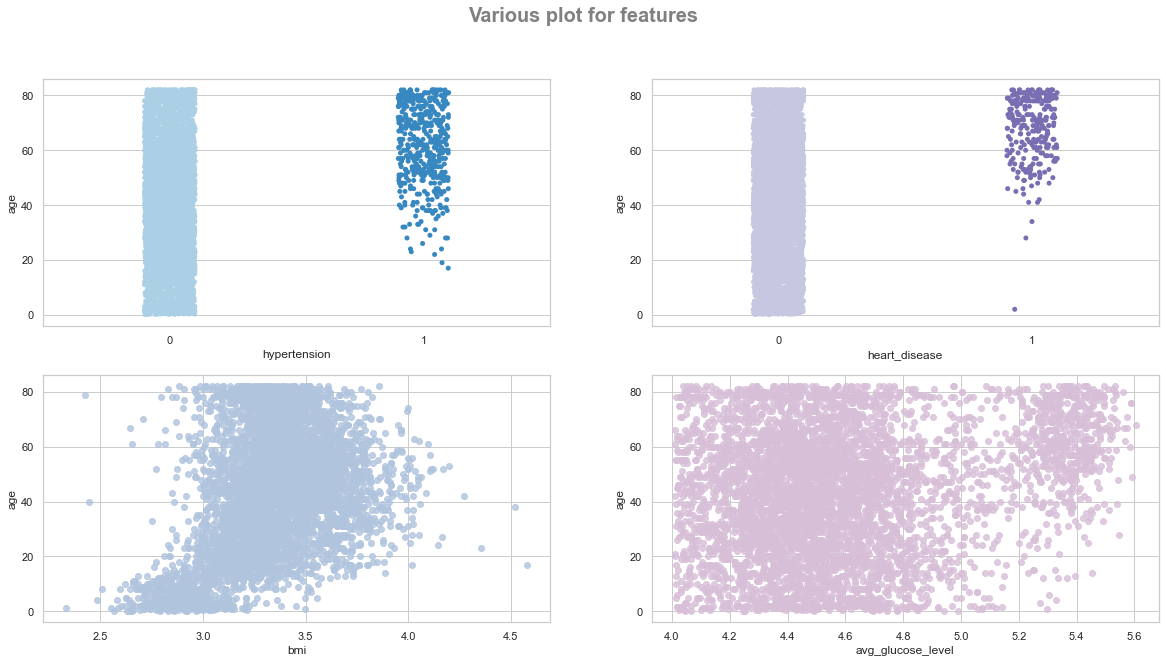

In [23]:
fig, ax = plt.subplots(2,2,figsize=(20,10))

plt.suptitle("Various plot for features", fontsize = 20, fontweight = 'bold', color='gray')

ax0 = sns.stripplot(x='hypertension', y='age', data=stroke_data, ax=ax[0,0], palette='Blues')
ax1 = sns.stripplot(x='heart_disease', y='age', data=stroke_data, ax=ax[0,1], palette='Purples' )
ax2 = sns.regplot(x='bmi', y='age', data=stroke_data, fit_reg=False, color='lightsteelblue', ax=ax[1,0])
ax3 = sns.regplot(x='avg_glucose_level', y='age', data=stroke_data, fit_reg=False, color='thistle', ax=ax[1,1])

plt.savefig("Various plot for features.png")

## <span style ="color:blue"> 3. Data Preprocessing </span>

### 결측치 확인

In [24]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### 결측치 대체 및 확인

In [25]:
stroke_data = stroke_data.fillna({'bmi':stroke_data['bmi'].mean()})

In [26]:
stroke_data.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [27]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### 성별 변수를 범주형으로 변경

In [28]:
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [29]:
stroke_data = stroke_data[~stroke_data['gender'].str.contains('Other')]

In [30]:
stroke_data['gender'] = stroke_data['gender'].map(
    {'Male':0, 'Female':1}).astype('int')

In [31]:
stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,Yes,Private,Urban,5.432367,3.600048,formerly smoked,1
1,51676,1,61.0,0,0,Yes,Self-employed,Rural,5.309307,3.328423,never smoked,1
2,31112,0,80.0,0,1,Yes,Private,Rural,4.662684,3.481240,never smoked,1
3,60182,1,49.0,0,0,Yes,Private,Urban,5.143008,3.538057,smokes,1
4,1665,1,79.0,1,0,Yes,Self-employed,Rural,5.159745,3.178054,never smoked,1


### 나이 변수 소수점 제거 (소수점 올림)

In [32]:
stroke_data['age'] = (stroke_data['age'].apply(np.ceil)).astype('int')

In [33]:
stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67,0,1,Yes,Private,Urban,5.432367,3.600048,formerly smoked,1
1,51676,1,61,0,0,Yes,Self-employed,Rural,5.309307,3.328423,never smoked,1
2,31112,0,80,0,1,Yes,Private,Rural,4.662684,3.481240,never smoked,1
3,60182,1,49,0,0,Yes,Private,Urban,5.143008,3.538057,smokes,1
4,1665,1,79,1,0,Yes,Self-employed,Rural,5.159745,3.178054,never smoked,1


### 결혼 여부 변수를 범주형으로 변경

In [34]:
stroke_data['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [35]:
stroke_data['ever_married'] = stroke_data['ever_married'].map({'No':0, "Yes":1}).astype('int')

In [36]:
stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67,0,1,1,Private,Urban,5.432367,3.600048,formerly smoked,1
1,51676,1,61,0,0,1,Self-employed,Rural,5.309307,3.328423,never smoked,1
2,31112,0,80,0,1,1,Private,Rural,4.662684,3.481240,never smoked,1
3,60182,1,49,0,0,1,Private,Urban,5.143008,3.538057,smokes,1
4,1665,1,79,1,0,1,Self-employed,Rural,5.159745,3.178054,never smoked,1


### 거주지 타입 변수를 범주형으로 변경

In [37]:
stroke_data['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [38]:
stroke_data['Residence_type'] = stroke_data['Residence_type'].map({'Urban':0, 'Rural':1}).astype('int')

In [39]:
stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67,0,1,1,Private,0,5.432367,3.600048,formerly smoked,1
1,51676,1,61,0,0,1,Self-employed,1,5.309307,3.328423,never smoked,1
2,31112,0,80,0,1,1,Private,1,4.662684,3.481240,never smoked,1
3,60182,1,49,0,0,1,Private,0,5.143008,3.538057,smokes,1
4,1665,1,79,1,0,1,Self-employed,1,5.159745,3.178054,never smoked,1


### get_dummies를 이용한 변경

In [40]:
stroke_data = pd.get_dummies(stroke_data, columns=['work_type', 'smoking_status'])
stroke_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0,67,0,1,1,0,5.432367,3.600048,1,0,0,1,0,0,0,1,0,0
1,51676,1,61,0,0,1,1,5.309307,3.328423,1,0,0,0,1,0,0,0,1,0
2,31112,0,80,0,1,1,1,4.662684,3.481240,1,0,0,1,0,0,0,0,1,0
3,60182,1,49,0,0,1,0,5.143008,3.538057,1,0,0,1,0,0,0,0,0,1
4,1665,1,79,1,0,1,1,5.159745,3.178054,1,0,0,0,1,0,0,0,1,0
5,56669,0,81,0,0,1,0,5.226875,3.367296,1,0,0,1,0,0,0,1,0,0
6,53882,0,74,1,1,1,1,4.249780,3.310543,1,0,0,1,0,0,0,0,1,0
7,10434,1,69,0,0,0,0,4.547435,3.126761,1,0,0,1,0,0,0,0,1,0
8,27419,1,59,0,0,1,1,4.332705,3.328423,1,0,0,1,0,0,1,0,0,0
9,60491,1,78,0,0,1,0,4.070223,3.186353,1,0,0,1,0,0,1,0,0,0


In [41]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5109 non-null   int64  
 1   gender                          5109 non-null   int32  
 2   age                             5109 non-null   int32  
 3   hypertension                    5109 non-null   int64  
 4   heart_disease                   5109 non-null   int64  
 5   ever_married                    5109 non-null   int32  
 6   Residence_type                  5109 non-null   int32  
 7   avg_glucose_level               5109 non-null   float64
 8   bmi                             5109 non-null   float64
 9   stroke                          5109 non-null   int64  
 10  work_type_Govt_job              5109 non-null   uint8  
 11  work_type_Never_worked          5109 non-null   uint8  
 12  work_type_Private               51

## <span style ="color:blue"> 4. ML Model Evaluation </span>

### Feature과 Label 정의

In [42]:
feature = stroke_data.drop(['id', 'stroke', 'smoking_status_Unknown'], axis=1)
label = stroke_data[['stroke']]

### Over-sampling 

#### <span style ="color:green"> Class imbalance (클래스 불균형)이란? </span>
#### - 어떤 데이터에서 각 클래스가 갖고 있는 데이터의 양에 차이가 큰 경우를 의미
#### - 소수 클래스의 의견에 귀를 기울이기 위한 작업 필요

#### <span style ="color:green"> 1) Weight balancing </span>
#### * Train 데이터에서 각 loss를 계산할 때, 특정 클래스에 대해서는 더 큰 loss를 계산
#### * 또는, 클래스의 비율에 대해 가중치를 줌
#### <span style ="color:green"> 2) Over-sampling / Under-sampling </span>
#### * Over-sampling : 양이 적은 데이터를 양이 많은 데이터에 맞추는 방법
##### <span style ="color:red"> - 단점) overfitting을 초래할 수 있음 </span>
#### * Under-sampling : 양이 많은 데이터를 양이 적은 데이터에 맞추는 방법
##### <span style ="color:red"> - 단점) 데이터 소실이 매우 크고, 중요한 데이터를 잃을 수 있음 </span>

#### <span style ="color:green"> SMOTE? </span>
##### - Over-sampling 방식 중 하나
##### - 합성 소수 샘플링 기술, 다수 클래스를 샘플링하고 기존 소수 샘플을 보간하여 새로운 소수 인스턴스를 합성
##### - 부트스트래핑 or KNN 모델 기법 활용
##### 단, 새로운 사례의 데이터 예측엔 취약할 수 있다는 단점 !
##### 출처 https://mkjjo.github.io/python/2019/01/04/smote_duplicate.html

In [43]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto')
X_sm, y_sm = sm.fit_resample(feature, label)

In [44]:
print("X_sm information\n")
print(X_sm.info())
print("\ny_sm information\n")
print(y_sm.info())

X_sm information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          9720 non-null   int32  
 1   age                             9720 non-null   int32  
 2   hypertension                    9720 non-null   int64  
 3   heart_disease                   9720 non-null   int64  
 4   ever_married                    9720 non-null   int32  
 5   Residence_type                  9720 non-null   int32  
 6   avg_glucose_level               9720 non-null   float64
 7   bmi                             9720 non-null   float64
 8   work_type_Govt_job              9720 non-null   uint8  
 9   work_type_Never_worked          9720 non-null   uint8  
 10  work_type_Private               9720 non-null   uint8  
 11  work_type_Self-employed         9720 non-null   uint8  
 12  work_type_childr

In [45]:
print(y_sm[y_sm['stroke']==1].value_counts(),y_sm[y_sm['stroke']==0].value_counts())

stroke
1         4860
dtype: int64 stroke
0         4860
dtype: int64


### 데이터 표준화

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sm)

### 학습 데이터와 테스트 데이터 분리

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_sm, test_size=0.3, random_state=5)

### 머신러닝 라이브러리 불러오기

In [48]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

### Machine Learning Model

#### 1. Logistic Regression Model
#### 2. XGBoost Model
#### 3. KNN Model
#### 4. RandomForest Model
#### 5. SVM

### <span style = "color:chocolate"> 예측 모델 설명 </span>

#### <span style = "color:brown"> 1. Logistic Regression </span>
#### - 회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1사이의 값으로 예측하고,
#### - 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘
#### <span style = "color:brown"> 2. XGBoost </span>
#### - Extreme Gradient Boosting의 약자
#### - 여러 개의 약한 의사결정나무를 조합해서 사용하는 앙상블 기법 중 하나
#### <span style = "color:brown"> 3. KNN </span>
#### - 데이터를 가장 가까운 속성에 따라 분류하여 레이블링 하는 알고리즘
#### - K개의 가장 가까운 이웃의 속성에 따라 분류
#### <span style = "color:brown"> 4. Random Forest </span>
#### - 여러 개의 작은 결정 트리를 만들고 해당 트리가 예측한 값들 중 가장 많은 값 혹은 평균값을 최종 예측값으로 정함
#### - 즉, 다수결의 원칙을 따름 (의견을 통합하거나 여러 가지 결과를 합치는 방식인 앙상블 학습 방법)
#### <span style = "color:brown"> 5. SVM </span>
#### - 분류를 위한 기준 선(Decision Boundary)을 정의하는 모델
#### - 분류되지 않은 새로운 점이 나타나면 경계의 어느 쪽에 속하는지 확인해서 분류 과제 수행


### Logistic Regression Model

In [49]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
pred = model_lr.predict(X_test)

lr_acc = accuracy_score(y_test,pred)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1453
           1       0.85      0.87      0.86      1463

    accuracy                           0.86      2916
   macro avg       0.86      0.86      0.86      2916
weighted avg       0.86      0.86      0.86      2916



### XGBoost Model

In [50]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
pred = model_xgb.predict(X_test)

xgb_acc = accuracy_score(y_test,pred)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1453
           1       0.91      0.96      0.94      1463

    accuracy                           0.93      2916
   macro avg       0.94      0.93      0.93      2916
weighted avg       0.94      0.93      0.93      2916



### KNN Model

In [51]:
model_knn = KNeighborsClassifier(n_neighbors=8)
model_knn.fit(X_train, y_train)
pred = model_knn.predict(X_test)

knn_acc = accuracy_score(y_test,pred)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1453
           1       0.85      0.93      0.89      1463

    accuracy                           0.89      2916
   macro avg       0.89      0.88      0.88      2916
weighted avg       0.89      0.89      0.88      2916



### RandomForest Model

In [52]:
model_forest = RandomForestClassifier(random_state=5)
model_forest.fit(X_train, y_train)
pred = model_forest.predict(X_test)

rf_acc = accuracy_score(y_test,pred)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1453
           1       0.92      0.96      0.94      1463

    accuracy                           0.94      2916
   macro avg       0.94      0.94      0.94      2916
weighted avg       0.94      0.94      0.94      2916



### SVM

In [53]:
model_svm = SVC(C=10, max_iter=1000, probability=True, random_state=5)
model_svm.fit(X_train, y_train)
pred = model_svm.predict(X_test)

svm_acc = accuracy_score(y_test,pred)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1453
           1       0.86      0.92      0.89      1463

    accuracy                           0.88      2916
   macro avg       0.88      0.88      0.88      2916
weighted avg       0.88      0.88      0.88      2916



## <span style ="color:blue"> 5. Conclusion </span>

### Model Accuracy

In [54]:
model_name = ['Logistic Regression', 'XGBoost', 'Random Forest', 'KNN', 'SVM']
model_accuracy = [lr_acc * 100,xgb_acc * 100 , rf_acc * 100, knn_acc * 100, svm_acc * 100 ]

model_acc = pd.DataFrame({'Model':model_name, 'Acc':model_accuracy})
model_acc = model_acc.set_index('Model')
model_acc

,Acc
Model,
Logistic Regression,85.973937
XGBoost,93.484225
Random Forest,94.067215
KNN,88.511660
SVM,88.100137


In [55]:
model_acc = model_acc.sort_values(by='Acc', ascending=False)
model_acc

,Acc
Model,
Random Forest,94.067215
XGBoost,93.484225
KNN,88.511660
SVM,88.100137
Logistic Regression,85.973937


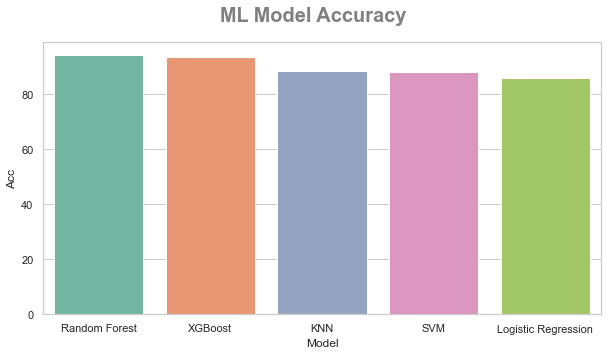

In [56]:
plt.rcParams['figure.figsize']=(10,5)

plt.suptitle("ML Model Accuracy", fontsize = 20, fontweight = 'bold', color='gray')

bars = sns.barplot(x=model_acc.index, y='Acc', data=model_acc, palette = 'Set2')

plt.savefig("ML_Model_Accuracy.png")

### Precision-Recall Curve

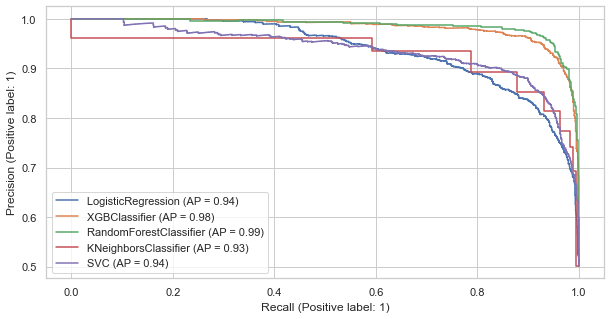

In [57]:
fig = plt.figure()
ax = fig.gca()

plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_forest, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_knn, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_svm, X_test, y_test, ax=ax)

plt.savefig("Precision_Recall_Curve.png")

### ROC Curve

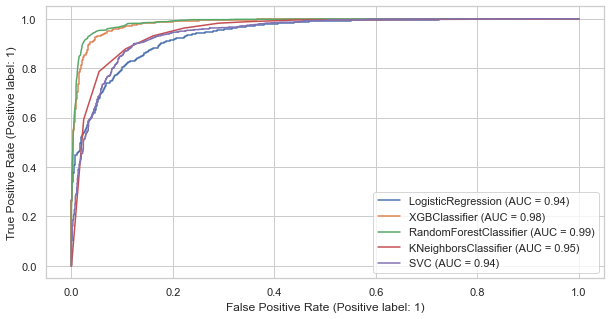

In [58]:
fig = plt.figure()
ax = fig.gca()

plot_roc_curve(model_lr, X_test, y_test, ax=ax)
plot_roc_curve(model_xgb, X_test, y_test, ax=ax)
plot_roc_curve(model_forest, X_test, y_test, ax=ax)
plot_roc_curve(model_knn, X_test, y_test, ax=ax)
plot_roc_curve(model_svm, X_test, y_test, ax=ax)

plt.savefig("ROC_Curve.png")